In [2]:
using Turing, StatsPlots

In [4]:
x = [0.8 102; 1 98; 0.5 100; 0.9 105; 0.7 103; 0.4 110; 1.2 99; 1.4 87; 0.6 113; 1.1 89; 1.3 93];

In [5]:
@model function pearson_correlation(x)
    rows = size(x, 1)
    # priors
    μ₁ ~ Normal(0, 100)
    μ₂ ~ Normal(0, 100)
    σ₁ ~ Uniform(0, 100)
    σ₂ ~ Uniform(0, 100)
    r ~ Uniform(-0.99, 0.99)
    Σ = [σ₁*σ₁ r*σ₁*σ₂;
         r*σ₁*σ₂ σ₂*σ₂]
    # likelihood
    for i = 1:rows
        x[i,:] ~ MvNormal([μ₁, μ₂], Σ)
    end
end


pearson_correlation (generic function with 2 methods)

In [7]:
chain = sample(pearson_correlation(x), NUTS(), 1000)

┌ Info: Found initial step size
└   ϵ = 0.8
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


Chains MCMC chain (1000×17×1 Array{Float64, 3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 0.37 seconds
Compute duration  = 0.37 seconds
parameters        = μ₁, μ₂, σ₁, σ₂, r
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std      mcse   ess_bulk   ess_tail      rhat   e ⋯
      Symbol   Float64   Float64   Float64    Float64    Float64   Float64     ⋯

          μ₁    0.9048    0.1245    0.0059   456.7899   400.2850    1.0010     ⋯
          μ₂   99.8338    2.9109    0.1407   431.9609   260.0665    0.9991     ⋯
          σ₁    0.3802    0.0934    0.0043   489.3114   529.1723    1.0041     ⋯
          σ₂    9.2014    2.3432    0.1129   457.1606   625.9025    1.0016     ⋯
           r   -0.7282    0.1581    0.0065   547.7493   4

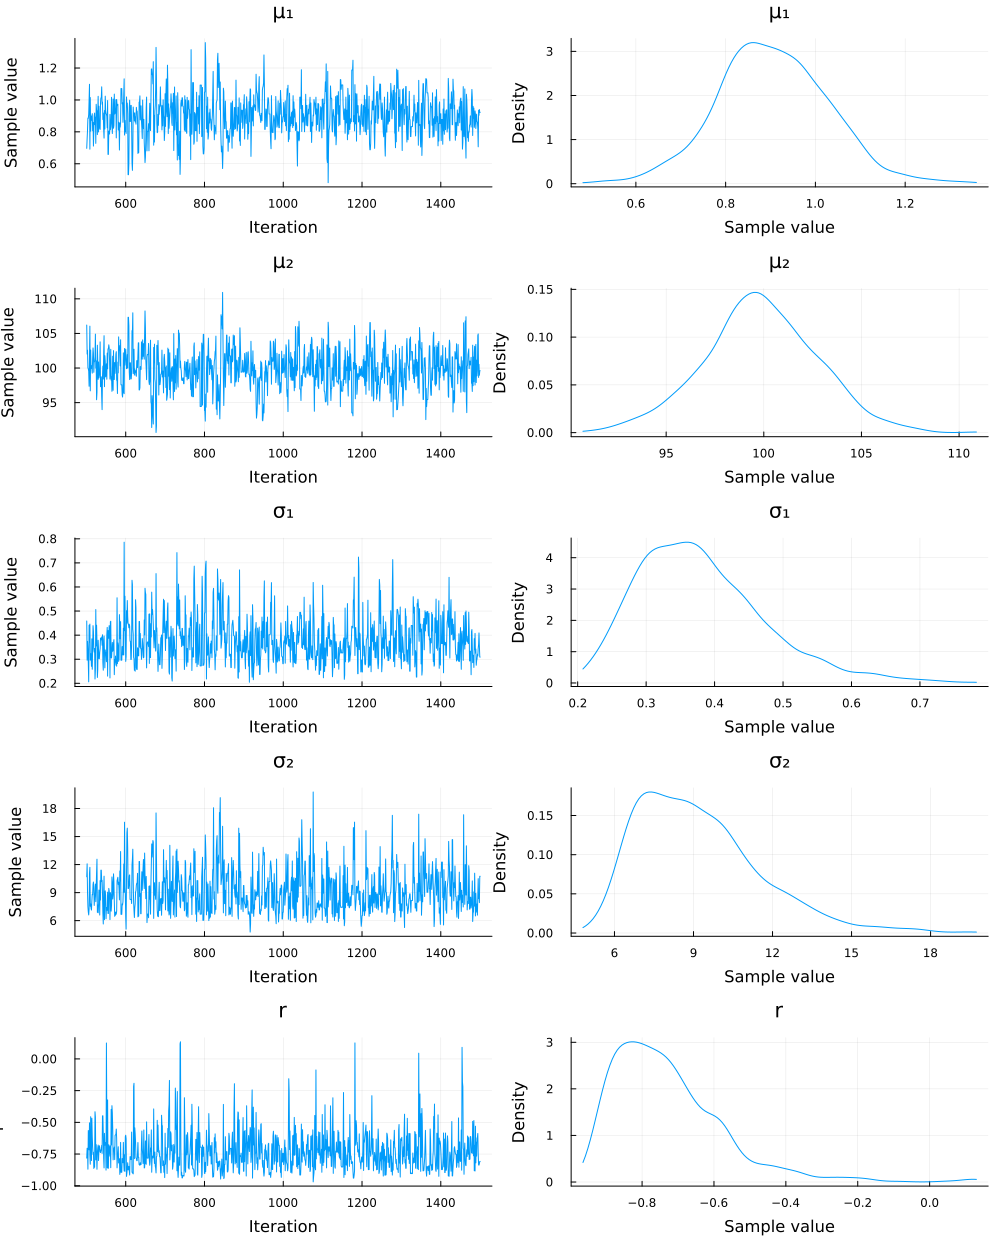

In [8]:
plot(chain)